In [11]:
from dataset import gen_dataset
from utils import treine
from utils import Eval_metric
import torch
from modelo import Linear
import matplotlib.image as mpimg
import matplotlib.pyplot as plt



In [2]:
Input, Output, Input_test, Output_test = gen_dataset(5)

(50, 30)
(50,)
(40, 30)
(40,)
Input_Train torch.Size([5, 10, 30])
Train_Labels torch.Size([5, 10, 1])
Input_test torch.Size([4, 10, 30])
test_Labels torch.Size([4, 10, 1])


In [7]:
def eval_model(proportion,epochs_i, epochs_f):
    y1 = []
    y2 = []
    epochs = []
    for epoch in range(epochs_i, epochs_f, 20):
        _,_,_,_ = gen_dataset(proportion)
        model = Linear()
        PATH_load = 'state_0_model.pt'
        model.load_state_dict(torch.load(PATH_load))
        treine(model,epoch)
        epochs.append(epoch)
        erro, acerto = Eval_metric(model,'test')
        #size = np.shape(Input_test)[0]*np.shape(Input_test)[1]
        #print(size)
        y1.append(erro)#/size)
        y2.append(acerto)#/size)
    return y1, y2, epochs

In [14]:
y1, y2, epochs = eval_model(5,20, 100)

(50, 30)
(50,)
(40, 30)
(40,)
Input_Train torch.Size([5, 10, 30])
Train_Labels torch.Size([5, 10, 1])
Input_test torch.Size([4, 10, 30])
test_Labels torch.Size([4, 10, 1])
Epoch:1,Loss:0.2489
Epoch:2,Loss:0.2550
Epoch:3,Loss:0.2393
Epoch:4,Loss:0.2381
Epoch:5,Loss:0.2327
Epoch:6,Loss:0.2292
Epoch:7,Loss:0.2287
Epoch:8,Loss:0.2233
Epoch:9,Loss:0.2201
Epoch:10,Loss:0.2165
Epoch:11,Loss:0.2104
Epoch:12,Loss:0.2054
Epoch:13,Loss:0.1972
Epoch:14,Loss:0.1901
Epoch:15,Loss:0.1798
Epoch:16,Loss:0.1702
Epoch:17,Loss:0.1588
Epoch:18,Loss:0.1479
Epoch:19,Loss:0.1374
Epoch:20,Loss:0.1268
erro =  0.375
acerto =  0.625
(50, 30)
(50,)
(40, 30)
(40,)
Input_Train torch.Size([5, 10, 30])
Train_Labels torch.Size([5, 10, 1])
Input_test torch.Size([4, 10, 30])
test_Labels torch.Size([4, 10, 1])
Epoch:1,Loss:0.2489
Epoch:2,Loss:0.2550
Epoch:3,Loss:0.2393
Epoch:4,Loss:0.2381
Epoch:5,Loss:0.2327
Epoch:6,Loss:0.2292
Epoch:7,Loss:0.2287
Epoch:8,Loss:0.2233
Epoch:9,Loss:0.2201
Epoch:10,Loss:0.2165
Epoch:11,Loss:

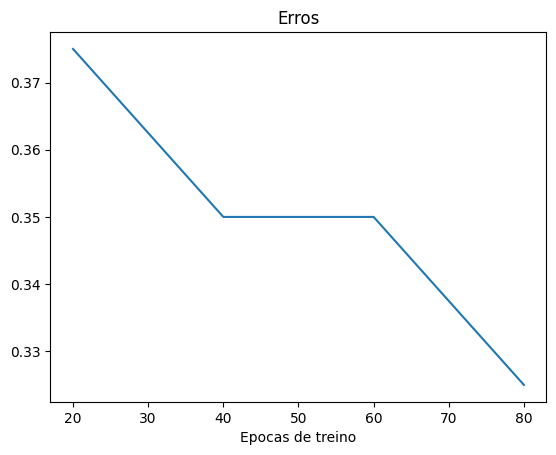

In [17]:
plt.plot(epochs, y1)
plt.xlabel('Epocas de treino')
plt.title('Erros')
plt.show()

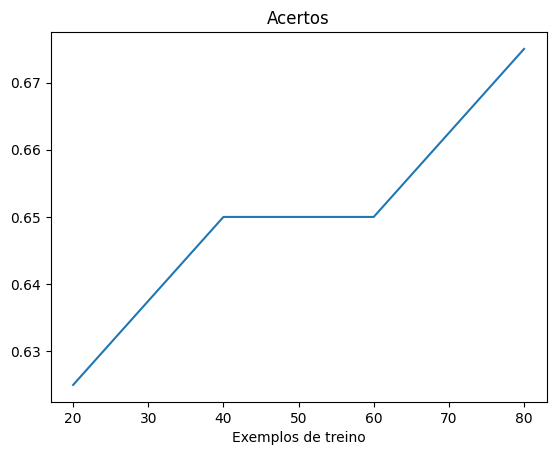

In [18]:
plt.plot(epochs, y2)
plt.xlabel('Exemplos de treino')
plt.title('Acertos')
plt.show()